# Logistic Regression (in 1D) - PART I

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

Create some toy data ...

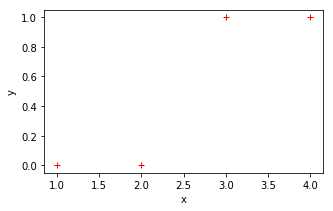

In [3]:
x = [[1.0], [2.0], [3.0], [4.0]]
y = [[0.], [0.], [1.], [1.]]

# Make sure we have our data as a tensor
x_data = torch.Tensor(x)
y_data = torch.Tensor(y)

# Visualize data ...
plt.figure(figsize=(5,3))
plt.plot(x,y,'r+')
plt.xlabel('x');
plt.ylabel('y');

## Model

Create a simple neural network that implements logistic regression, i.e., we model the conditional probability of label $1$ under $x$ as 

$$P(y=1|x) = sigm(\langle w,x \rangle + b),$$

where 

$$sigm(x) = \frac{1}{1+e^{-x}}\enspace.$$

is the **sigmoid** function. So, for $x=0$, the sigmoid returns 0.5. If interpreted as the probability of class label 1 given $x$, this means that the classifier would be undecided (i.e., random guessing if label 0 or 1).

In [10]:
print('sigm(0)={}'.format(F.sigmoid(torch.Tensor([0])).item()))

sigm(0)=0.5


Lets specify our logistic regression model as a Pytorch class.

In [11]:
# Derive from torch.nn.Module
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1, bias=True) # implements <w,x> + b

    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x)) # implements 1/(1+exp(-<w,x>+b))
        return y_pred

Just as a reminder, in 1D we effectively have

$$P(y=1|x) = \frac{1}{1+e^{-(\langle w, x\rangle +b)}}$$

In [12]:
# Lets instantiate that model
model = Model()

Our labels are in $\{0,1\}$. Our data points $x$ in $\mathbb{R}$. If we want to fit our model to a training set of $N$ points $(x_i,y_i)$, we need a way to measure the quality of the fit. However, our targets are binary variables (i.e., class labels, either $0$ or $1$). 

In logistic regression, we model $P(y|x)$ as a Bernoulli random variabe, where the probability of event $1$ is given by the sigmoid function. Assuming all $x_i$ are **independent and identically (iid)** distributed, we can write

$$ p((y_1,\ldots,y_n)|X=(x_1,\ldots,x_n)) = \prod_i \left( \frac{1}{1+\exp^{-(wx+b)}} \right)^{y_i} 
\left(1-\frac{1}{1+\exp^{-(wx+b)}} \right)^{1-y_i}$$

Note that we have left-out the inner product notation $\langle \cdot,\cdot \rangle$, as we are dealing with 1D data.

## Objective

Our goal is to choose $(w,b)$ such that this likelihood is **maximized**. We also switch to log-space for numerical stability and get

$$p((y_1,\ldots,y_n)|X=(x_1,\ldots,x_n)) = \sum_i y_i \log(\pi_i) + (1-y_i)\log(1-\pi_i)$$

Effectively, we could also minimize the **negative** of this sum and denote this as our **cost/loss** function $J(\theta)$ with $\theta=[w,b]$. In machine learning this is called the **binary cross entropy** loss. "Binary" because we have two classes and "cross entropy" because we effectively measure the cross entropy between target and output.

Lets look at the current output of the model (uninitialized) ...

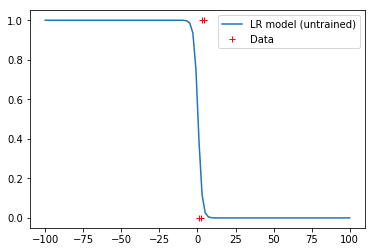

In [13]:
import numpy as np

x_i = torch.Tensor(np.linspace(-100,100,100).T).unsqueeze(1) # (100,1)
y_i = model(x_i)

plt.plot(x_i.detach().numpy(),y_i.detach().numpy())
plt.plot(x,y,'r+')
plt.legend(['LR model (untrained)', 'Data'])

# Logistic Regression (in 1D) - PART II

To **train** the model, we will (1) need a suitable loss function and (2) a way to optimize the paramters $(w,b)$.